In [1]:
%matplotlib inline

import numpy as np
import pylab as plt

PyGDSM quickstart
------------------

PyGDSM provides an interface to the Global Sky Model (2008):

#### A model of diffuse Galactic radio emission from 10 MHz to 100 GHz
###### A. de Oliveira-Costa, M. Tegmark, B.M. Gaensler, J. Jonas, T.L. Landecker and P. Reich
[MNRAS 388, 247-260 (2008)](https://ui.adsabs.harvard.edu/abs/2008MNRAS.388..247D/abstract)


Firstly, we import the `pygdsm` module:

In [2]:
from pygdsm import GlobalSkyModel

We can very quickly get started with generating a sky map and plotting it:

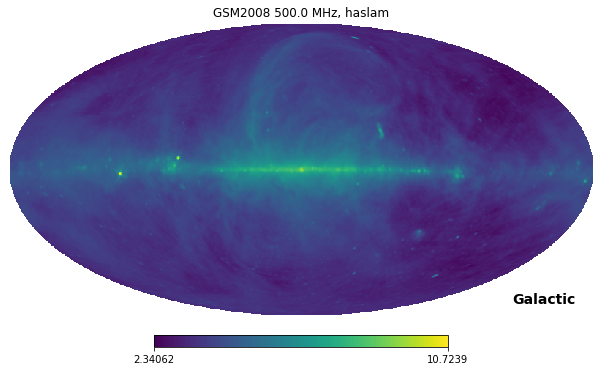

In [3]:
gsm = GlobalSkyModel()
gsm.generate(500)
gsm.view(logged=True)

We might then want to write this to a FITS file (in healpix format):

In [4]:
gsm.write_fits("gdsm_500mhz.fits")

setting the output map dtype to [dtype('float64')]


There are also a few options we can play around with. For example:

* let's change to use a different interpolation method (pchip) 
* instead of using the Haslam 408 MHz map for structure, let's use WMAP 23 GHz
* instead of using MHz to define the units, let's use GHz

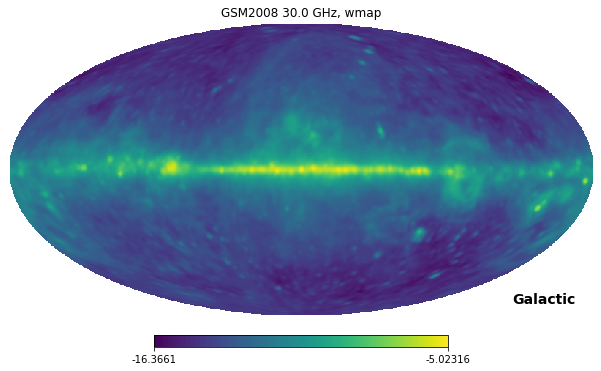

In [5]:
gsm = GlobalSkyModel(freq_unit='GHz', interpolation='pchip', basemap='wmap')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=True)

You can set things on the fly, too, once you've got a `gsm` object:

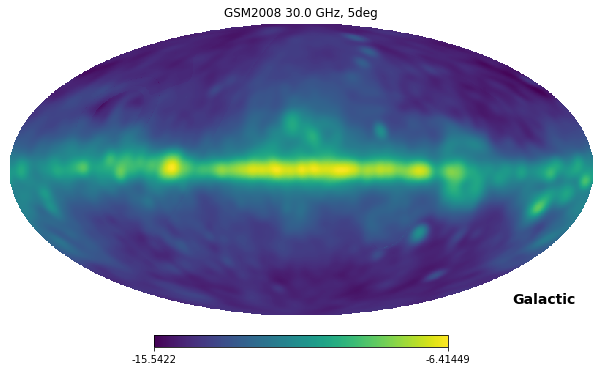

In [6]:
gsm.set_basemap('5deg')
gsm.view(logged=True)

Just in case you're interested in spectral cubes, you can even pass a frequency range:

(100, 3145728)


Text(0, 0.5, 'Temperature [K]')

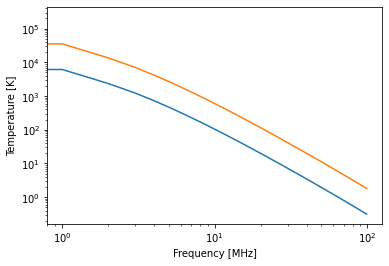

In [7]:
gsm = GlobalSkyModel()
freqs = np.linspace(10, 1000, 100)
map_cube = gsm.generate(freqs)

print(map_cube.shape)
plt.loglog(map_cube[:,0])
plt.loglog(map_cube[:,12345])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Temperature [K]")

Be careful with this one though, as it can eat up a lot of memory!

## Generate observed sky for a given lat, long

A common task is to find out what the sky looks like at a given lat, long and date. `PyGSM` gives a quick method to do this:

In [8]:
from pygdsm import GSMObserver
from datetime import datetime

# Setup observatory location - in this case, Parkes Australia
(latitude, longitude, elevation) = ('-32.998370', '148.263659', 100)
ov = GSMObserver()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 1, 1, 23, 0)

Now generate a sky model and view an all-sky orthographic plot

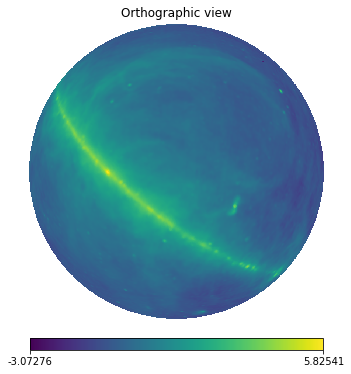

In [9]:
ov.generate(1400)
d = ov.view(logged=True)

And we can view galactic Mollweide projection too, with below-horizon data blanked out:

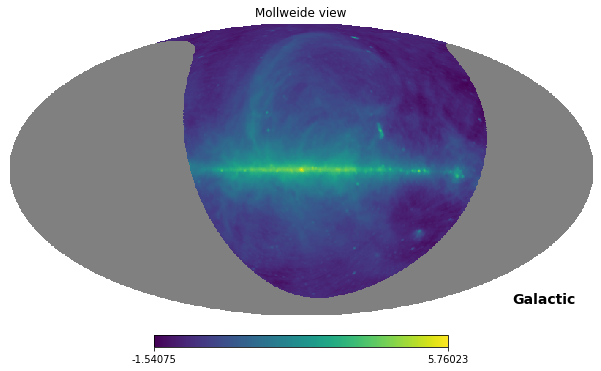

In [10]:
d = ov.view_observed_gsm(logged=True)